# Student Performance Analysis - Math
An analysis of high school **student performance on Math subject** based on demographic conditions, family background, social life, and school related features.

### Data Description
* Dataset ini memiliki 33 features. 
* Penjelasan untuk setiap feature dapat dibaca [di sini](https://github.com/ricoputrap/student-performance-analysis/tree/master/datasets).

### Acknowledgement
Tahapan-tahapan dalam melakukan EDA ini dipelajari dari [Titanic Data Science Solutions by Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("../datasets/student-mat.csv", sep=';')

### Describing Data

In [3]:
# overview the data
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# get data dimension
print('Number of columns:', df.shape[0])
print('Number of rows:', df.shape[1])

Number of columns: 395
Number of rows: 33


#### Features data types
* ***Numerical***
    * **Continuous**: age, G1, G2, and G3 (dependent/target variable)
    * **Discrete**: failures, absences
* ***Categorical***
    * **Nominal**: school, sex, address, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
    * **Ordinal**: famsize, Medu, Fedu, traveltime, studytime, famrel, freetime, goout, Dalc, Walc, health

#### Segmenting the independent variables (IV)
1. **Demographic**: sex, age, address
2. **Family**: famsize, Pstatus, Medu, Fedu, Mjob, Fjob
3. **Social**: activities, internet, romantic, famrel, freetime, goout, Dalc, Walc, health
4. **School**: school, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, nursery, higher, absences, G1, G2

#### Filtering the most important features (independent variables)
At this stage I will take some of the **independent variables** that I think have the **highest priority** to be explored. I filtered the IVs based on my **expectations** on them to make them as **predictor variables** for building machine learning models later. 

This stage's done purely based on my personal subjectivity. This is done so that I can understand several IVs in depth at this initial step. This subjectivity will later be validated in the next steps.

I asked three questions while doing this stage:
1. Are we going to **consider** this variable in order to **maintain someone learning performance**?
2. Will someone **pay attention** to this variable when **going to school / taking exams**?
3. Has the information from this variable been **explained by other variables**?
4. Does this variable play an **important role** in **quality of learning**?

After answering those questions, here are the most important features for me:
1. **age** - self-awarness on the importance of learning
2. **internet** - easy access to study material or use it to kill time
3. **goout** - time management
4. **studytime** - study, study, and study!
5. **higher** - be more motivated to study
6. **G1**
7. **G2**

### Data Cleaning
From the output below, we know that our dataset is free of duplicated record and missing value. Furthermore, the values in each features has the appropriate data type. Last but not least, we separate the target variable (G3) from the predictor variable candidates. We do this for ease of analysis purposes only.

#### Duplicated records

In [8]:
print('Number of duplicated records:', df.duplicated().sum())

Number of duplicated records: 0


#### Missing values

In [9]:
df.isnull().values.any()

False

#### Observe inappropriate data types

In [14]:
cols = df.columns.values

for i in range(33):
    print(cols[i] + ': ' + str(df.iloc[:,i].unique()) + ' as ' + str(type(df.iloc[:,i][0])))

school: ['GP' 'MS'] as <class 'str'>
sex: ['F' 'M'] as <class 'str'>
age: [18 17 15 16 19 22 20 21] as <class 'numpy.int64'>
address: ['U' 'R'] as <class 'str'>
famsize: ['GT3' 'LE3'] as <class 'str'>
Pstatus: ['A' 'T'] as <class 'str'>
Medu: [4 1 3 2 0] as <class 'numpy.int64'>
Fedu: [4 1 2 3 0] as <class 'numpy.int64'>
Mjob: ['at_home' 'health' 'other' 'services' 'teacher'] as <class 'str'>
Fjob: ['teacher' 'other' 'services' 'health' 'at_home'] as <class 'str'>
reason: ['course' 'other' 'home' 'reputation'] as <class 'str'>
guardian: ['mother' 'father' 'other'] as <class 'str'>
traveltime: [2 1 3 4] as <class 'numpy.int64'>
studytime: [2 3 1 4] as <class 'numpy.int64'>
failures: [0 3 2 1] as <class 'numpy.int64'>
schoolsup: ['yes' 'no'] as <class 'str'>
famsup: ['no' 'yes'] as <class 'str'>
paid: ['no' 'yes'] as <class 'str'>
activities: ['no' 'yes'] as <class 'str'>
nursery: ['yes' 'no'] as <class 'str'>
higher: ['yes' 'no'] as <class 'str'>
internet: ['no' 'yes'] as <class 'str'>


#### Separate target variable from the predictor variables

In [22]:
targ_var = df['G3']
pred_var = df.iloc[:,:-1]
pred_var.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


### Get to know a little about the target variable
In this project, the target variable was G3 (final grade).

In [27]:
# descriptive statistic of G3
targ_var.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [49]:
# get the mode of G3
print("Mode: {}".format(int(targ_var.mode())))

Mode: 10


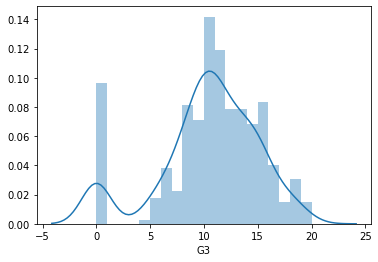

In [54]:
# data distribution of G3
sns.distplot(targ_var, bins=20)

In [50]:
print("Percentage of 0 on dataset: {:.2f} %".format(100 * len(targ_var[targ_var == 0]) / len(targ_var)))

Percentage of 0 on dataset: 9.62 %


In [32]:
# skewness & kurtosis of G3
print("Skewness: {}".format(targ_var.skew()))
print("Kurtosis: {}".format(targ_var.kurt()))

Skewness: -0.7326723530443435
Kurtosis: 0.4034208131242458


From the output above, we can make conclusions about our target variable (G3):
* The mean, median, and mode values are **almost the same**
* G3 has **0 values (9.62%)**. We will treat this thing in the next steps.
* G3 has a **bimodal distribution**. It has two peaks: 0 and 10
* G3 is **moderately (positive) skewed** ([skewness between -1 and -0.5](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics))


### Get to know a little about the most important predictor variables
Age, internet, goout, studytime, higher, G1, and G2

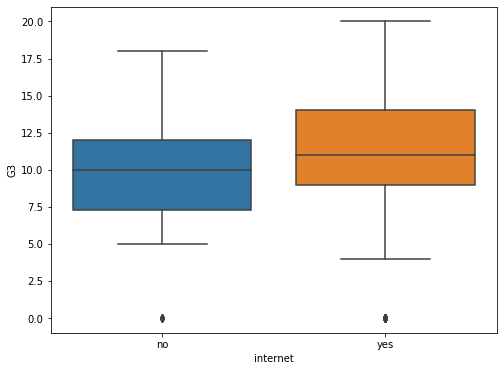

In [59]:
var = 'internet'
data = pd.concat([targ_var, pred_var[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="G3", data=data)
# fig.axis()

#### Features may contain blank, null, or empty values

Based on the output below, there is no missing values in the dataset.

In [32]:
#define a function for observing missing values in the dataframe
def observe_missing_values(df):
    num_of_mis_val = df.isnull().sum().sort_values(ascending=False)
    percentage_of_mis_val = 100 * df.isnull().sum() / len(df)
    
    # create the table
    table_of_mis_val = pd.concat([num_of_mis_val, percentage_of_mis_val], axis=1, keys=['Total', 'Percent'])
    
    # get variables with null values only
    table_of_mis_val = table_of_mis_val[table_of_mis_val['Total'] != 0]
    
    return table_of_mis_val

In [33]:
# get the missing values
observe_missing_values(df)

,Total,Percent


#### Features may contain errors or typos

Based on the output below, we know that there is no error/typo in the dataset.

In [23]:
def get_uniques():
    for i in range(33):
        print(cols[i] + ': ' + str(df.iloc[:,i].unique()))

In [24]:
get_uniques()

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

#### Data types for various features

This helps us on converting the values of each features to be the required format for the choosen algorithm model.
* 16 features are integers.
* 17 features are strings (object)

In [9]:
# simple info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### The distribution of numerical features values across the dataset

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


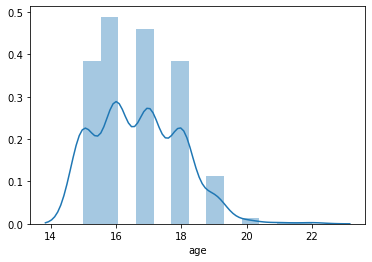

In [27]:
sns.distplot(df['age'])

#### The distribution of categorical features

In [26]:
df.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


* sex variable consist of 